# Analyze US Traffic Accident Data

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Load

In [2]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Severity

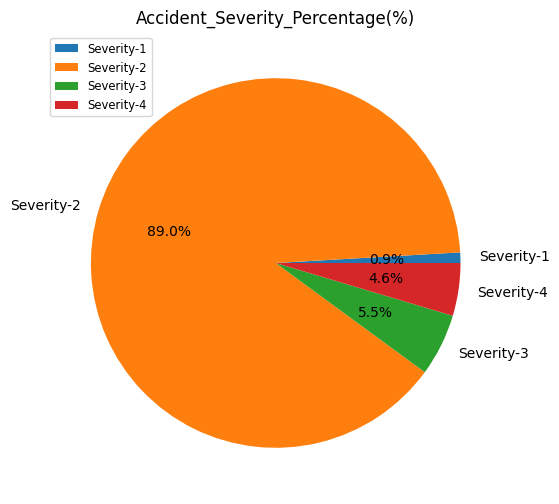

In [4]:
values=[df['Severity'].value_counts(normalize=True)[i]*100 for i in range(1,5)]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=[f"Severity-{i}"  for i in range(1,5)], autopct='%1.1f%%', startangle=0)
plt.title('Accident_Severity_Percentage(%)')
plt.legend(loc='upper left', fontsize='small')

plt.show()

# Top 10 Accident Prone Countries

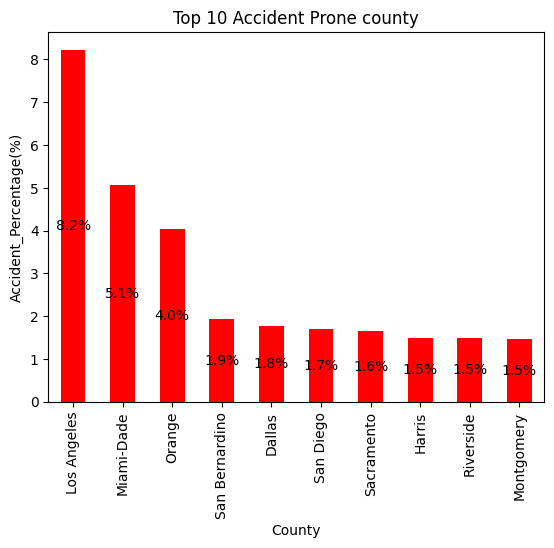

In [5]:
value_counts=df.County.value_counts(normalize=True)[:10]*100
ax=value_counts.plot(kind='bar', color='r')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('County')
plt.ylabel('Accident_Percentage(%)')
plt.title('Top 10 Accident Prone county')
plt.show()


# Top 10 Accident Prone States

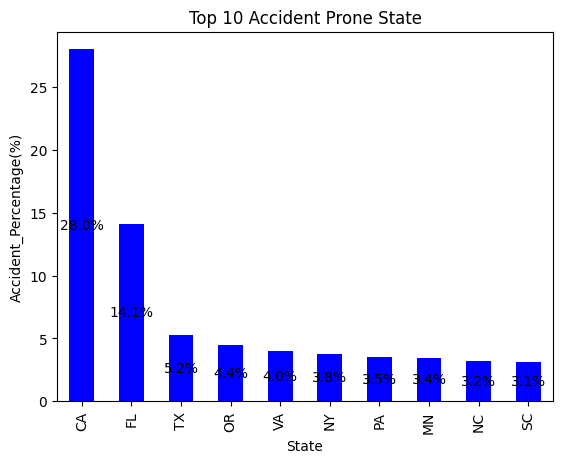

In [6]:
value_counts=df.State.value_counts(normalize=True)[:10]*100
ax=value_counts.plot(kind='bar', color='b')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('State')
plt.ylabel('Accident_Percentage(%)')
plt.title('Top 10 Accident Prone State')
plt.show()

# Top 10 Accident Prone Zipcode in State-'CA'

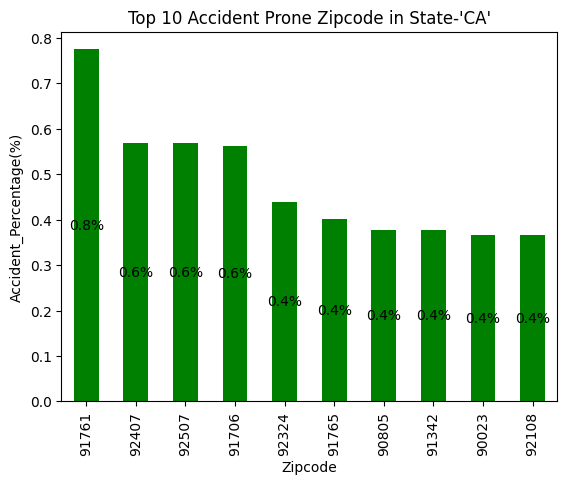

In [7]:
value_counts=df[df["State"]=="CA"].Zipcode.value_counts(normalize=True)[:10]*100
ax=value_counts.plot(kind='bar', color='g')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Zipcode')
plt.ylabel('Accident_Percentage(%)')
plt.title("Top 10 Accident Prone Zipcode in State-'CA'")
plt.show()

# Top 10 Accident Prone Cities

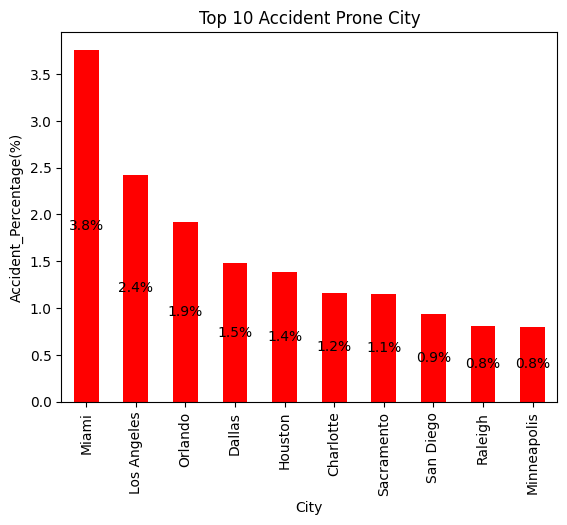

In [8]:
value_counts=df.City.value_counts(normalize=True)[:10]*100
ax=value_counts.plot(kind='bar', color='r')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('City')
plt.ylabel('Accident_Percentage(%)')
plt.title('Top 10 Accident Prone City')
plt.show()

# Accident Suitable Road Side

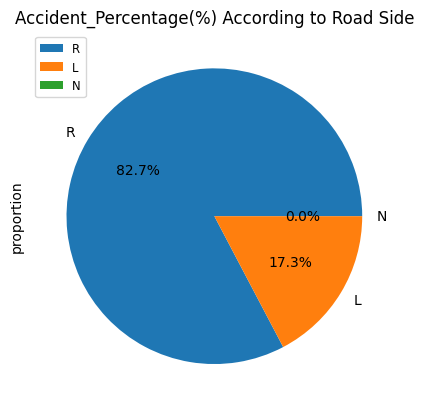

In [9]:
values=df.Side.value_counts(normalize=True)*100
values.plot(kind='pie', autopct='%1.1f%%')
plt.title('Accident_Percentage(%) According to Road Side')
plt.legend(loc='upper left', fontsize='small')

plt.show()

# Top 10 Accident Prone Streets

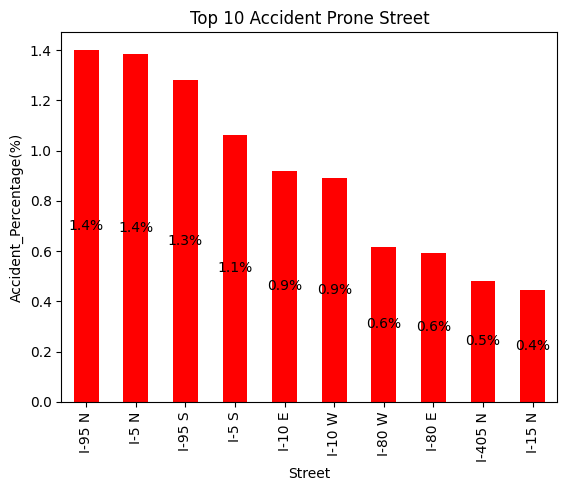

In [10]:
value_counts=df.Street.value_counts(normalize=True)[:10]*100
ax=value_counts.plot(kind='bar', color='r')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Street')
plt.ylabel('Accident_Percentage(%)')
plt.title('Top 10 Accident Prone Street')
plt.show()

# Accident Suitable Timezone

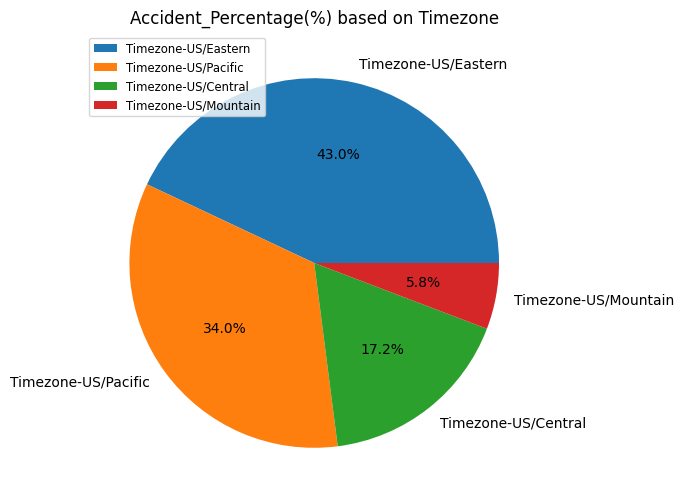

In [11]:
values=[df["Timezone"].value_counts(normalize=True)[i] for i in range(4)]
plt.figure(figsize=(8, 6))
plt.pie(values, labels=[f"Timezone-{i}"  for i in df["Timezone"].value_counts().index], autopct='%1.1f%%', startangle=0)
plt.title('Accident_Percentage(%) based on Timezone')
plt.legend(loc='upper left', fontsize='small')

plt.show()

# Top 10 Accident Prone Location cloest to Airport

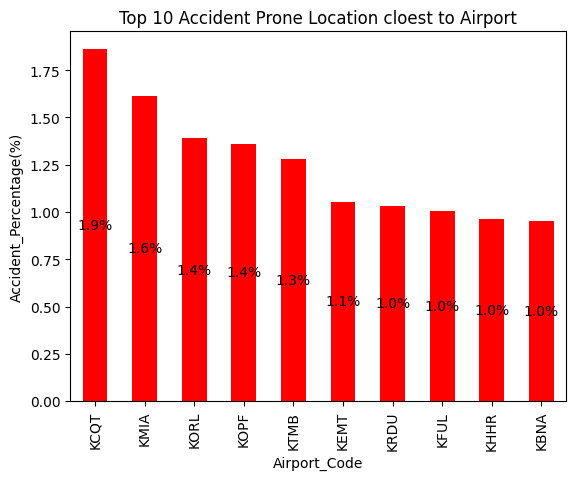

In [12]:
value_counts=df.Airport_Code.value_counts(normalize=True)[:10]*100
ax=value_counts.plot(kind='bar', color='r')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Airport_Code')
plt.ylabel('Accident_Percentage(%)')
plt.title('Top 10 Accident Prone Location cloest to Airport')
plt.show()

# Accident Suitable Road condition

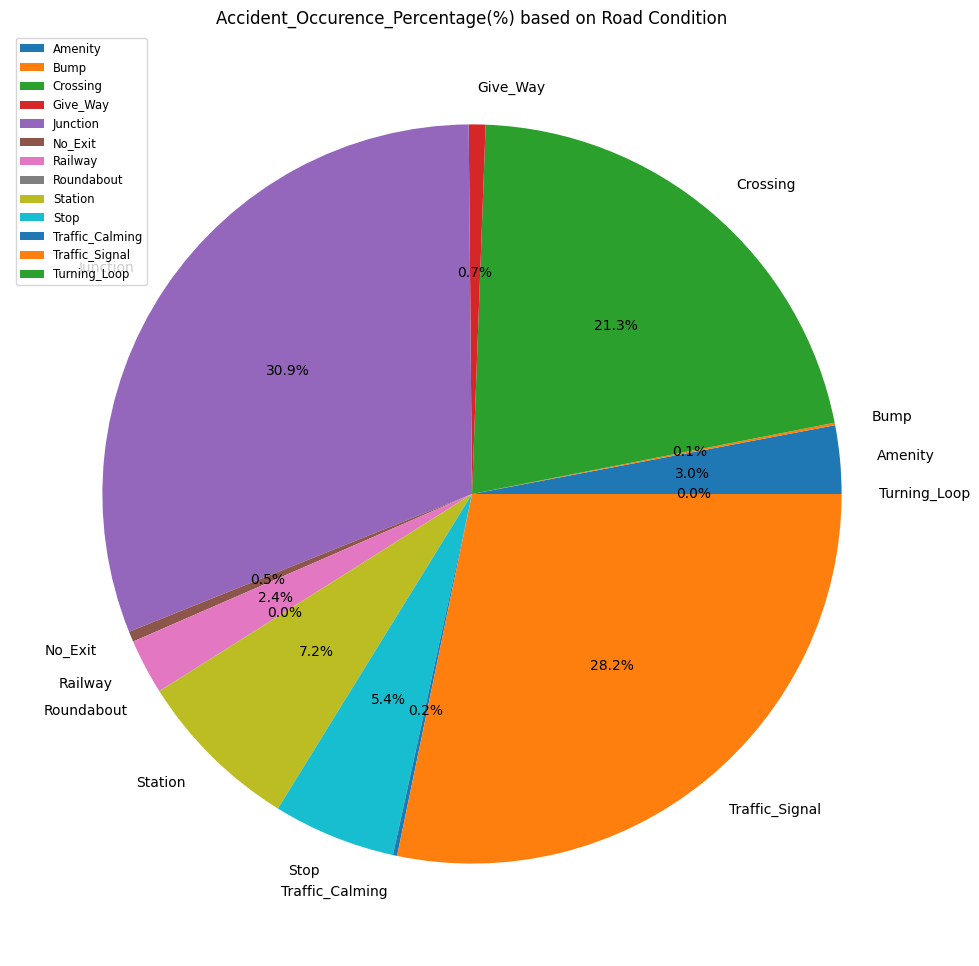

In [13]:
road_condiition=[df.columns[i] for i in range(30,43)]
val=[]
for i in road_condiition:
    c=np.round(df[i].value_counts(normalize=True)*100,6)
    if True in c:
        val.append(c[1] )
    else:
        val.append(0) 
plt.figure(figsize=(12,12))        
plt.pie(val,labels=road_condiition, autopct='%1.1f%%', startangle=0)
plt.title('Accident_Occurence_Percentage(%) based on Road Condition')
plt.legend(loc='upper left', fontsize='small')
plt.show() 

# Top 10 Accident Suitable Weather Conditions

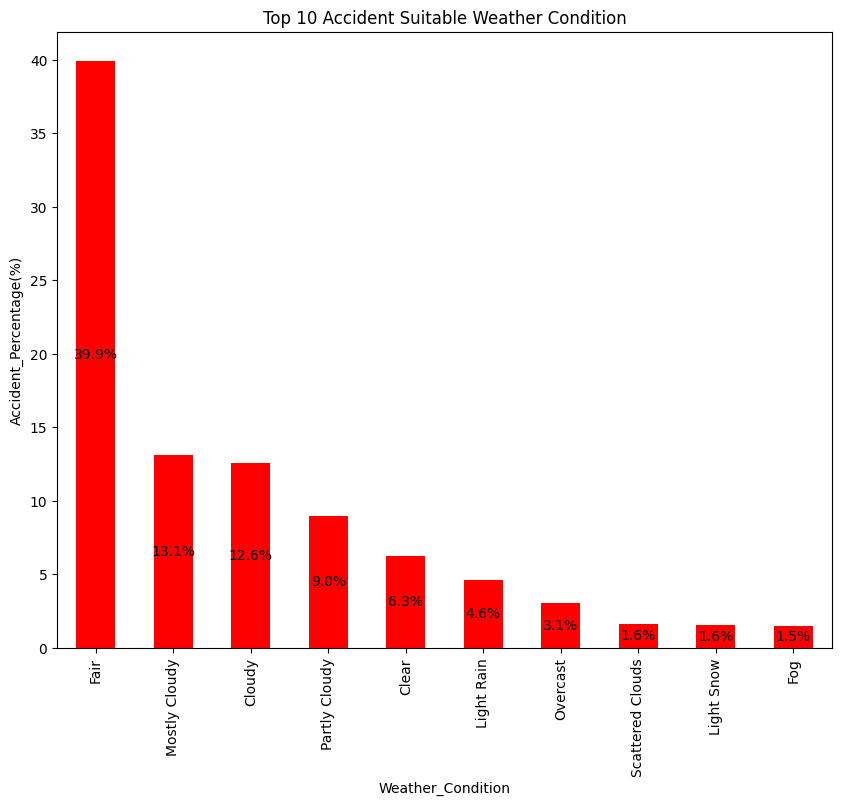

In [14]:
value_counts=df.Weather_Condition.value_counts(normalize=True)[:10]*100
plt.figure(figsize=(10,8))
ax=value_counts.plot(kind='bar', color='r')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
plt.xlabel('Weather_Condition')
plt.ylabel('Accident_Percentage(%)')
plt.title('Top 10 Accident Suitable Weather Condition')
plt.show()

# Accident Suitable in day and night Time

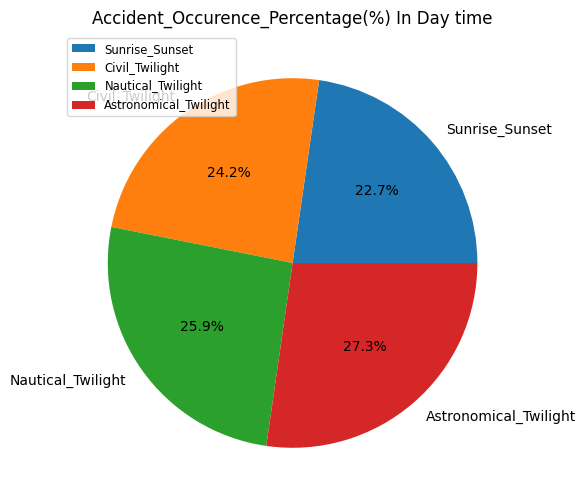

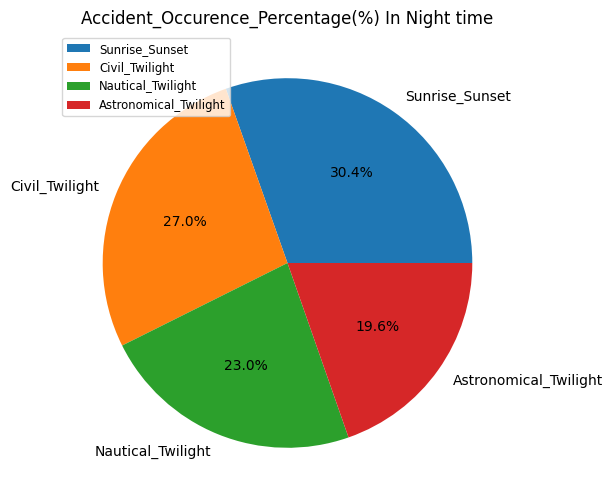

In [15]:
condiition=[df.columns[i] for i in range(43,47)]
time=['Day','Night']
for j in range(2):
    val=[df[i].value_counts(normalize=True)[j]*100 for i in condiition]
    plt.figure(figsize=(8,6))        
    plt.pie(val,labels=condiition, autopct='%1.1f%%', startangle=0)
    plt.title(f'Accident_Occurence_Percentage(%) In {time[j]} time')
    plt.legend(loc='upper left', fontsize='small')
    plt.show() 

# ThAnK YoU !